In [1]:
import util

train_loader, val_loader, test_loader = util.make_loaders(batch_size = 1, mode = 'test', sample_mode='')

/localdisk0/SCRATCH/cgarchbold/envs/py40/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1915 1532.0 191.5 192


In [2]:
from tqdm import tqdm

train_values = []

for batch in tqdm(train_loader):
    image, masks, values = batch['image'], batch['masks'], batch['values']
    indices = values.nonzero(as_tuple=True)
    train_values.extend(values[indices])
    #print(train_values)


100%|██████████| 1532/1532 [00:09<00:00, 167.61it/s]


In [3]:
import numpy as np
from scipy import stats
import torch

train_values = np.array(train_values)

mu,std = stats.norm.fit(train_values)

gauss = torch.distributions.Normal(mu,std)

In [4]:
test_values = []
for batch in tqdm(test_loader):
    image, masks, values = batch['image'], batch['masks'], batch['values']
    indices = values.nonzero(as_tuple=True)
    test_values.extend(values[indices])

100%|██████████| 192/192 [00:01<00:00, 133.50it/s]


In [5]:
test_values = np.array(test_values)

mae = np.mean(np.abs(test_values-mu))
mape = np.mean(np.abs(mu-test_values)/test_values)*100
log_prob = gauss.log_prob(torch.tensor(test_values))
boundary_val = torch.tensor(10000)
metric = torch.mean(gauss.cdf(torch.tensor(test_values) + boundary_val) - gauss.cdf(torch.tensor(test_values) - boundary_val))

print(mae,mape, torch.mean(log_prob),torch.median(log_prob), metric)

77152.21042586434 34.84194157828856 tensor(-12.9240, dtype=torch.float64) tensor(-12.6232, dtype=torch.float64) tensor(0.0570, dtype=torch.float64)


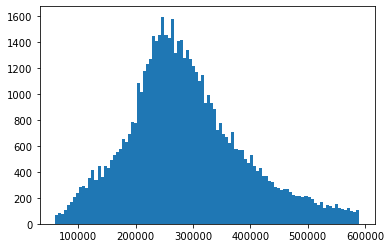

In [6]:
import matplotlib.pyplot as plt

plt.hist(train_values, bins=100)
plt.show()

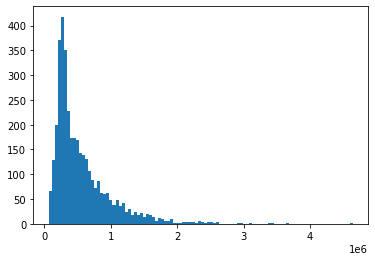

In [8]:
plt.hist(test_values, bins=100)
plt.show()